In [1]:
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Load files

In [2]:
from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open(path +"X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open(path +"X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open(path +"X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open(path +"Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open(path +"Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open(path +"Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

with open(path + "train_avgw2v.txt", "rb") as file:
    train_avgw2v = pickle.load(file)
with open(path + "cv_avgw2v.txt", "rb") as file:
    cv_avgw2v = pickle.load(file)
with open(path + "test_avgw2v.txt", "rb") as file:
    test_avgw2v = pickle.load(file)

with open(path + "train_tfw2v.txt", "rb") as file:
    train_tfw2v = pickle.load(file)
with open(path + "cv_tfw2v.txt", "rb") as file:
    cv_tfw2v = pickle.load(file)
with open(path + "test_tfw2v.txt", "rb") as file:
    test_tfw2v = pickle.load(file)
    

## Perturbation test

0 th percentile :  4.451370647263386e-06
10 th percentile :  0.01870391465522537
20 th percentile :  0.03832933387488243
30 th percentile :  0.06094077172820901
40 th percentile :  0.08968890381892705
50 th percentile :  0.1353832989351886
60 th percentile :  0.2202589423566125
70 th percentile :  0.39585115928025555
80 th percentile :  0.8890882690016628
90 th percentile :  3.886160344864363
100 th percentile :  9692.69245682406


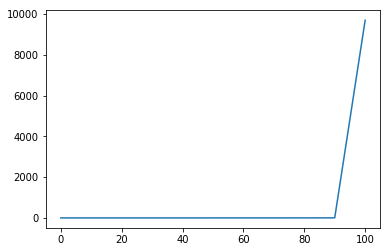

In [21]:
# Please write all the code with proper documentation0

LR = LogisticRegression(penalty='l2',C=1)
LR.fit(train_bow,Y_train)
weight1 = LR.coef_ # weight vector

# Getting new data set by addind a small noise
new_train = train_bow.astype(float)
new_train.data += np.random.uniform(-0.0001,0.0001,1 )

# Fitting the model again on new data
LR = LogisticRegression(penalty='l2',C=1)
LR.fit(new_train,Y_train)
weight2 = LR.coef_

# Adding small esilon to weight vector to avoid division by 0
weight1 += 10**-6
weight2 += 10**-6

percentage_change_vector = abs( (weight1-weight2) / (weight1) )*100

t = range(0,101,10)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

There is a sudden change between 90th and 100th percentile

90 th percentile :  3.886160344864363
91 th percentile :  4.795425819510029
92 th percentile :  5.768714146563576
93 th percentile :  7.023537370630276
94 th percentile :  8.286863364100858
95 th percentile :  9.916093637773452
96 th percentile :  12.414431307501014
97 th percentile :  15.195465026239322
98 th percentile :  20.396779643912797
99 th percentile :  29.260534985921115
100 th percentile :  9692.69245682406


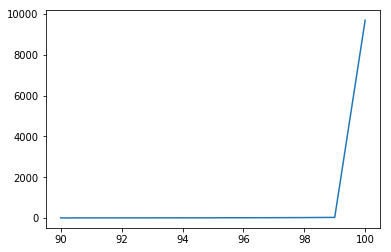

In [24]:
t = range(90,101,1)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

There is a sudden change between 95th percentile onwards

95.0 th percentile :  9.916093637773452
95.5 th percentile :  11.038820595647032
96.0 th percentile :  12.414431307501014
96.5 th percentile :  13.821363534929556
97.0 th percentile :  15.195465026239322
97.5 th percentile :  17.554993392995918
98.0 th percentile :  20.396779643912797
98.5 th percentile :  24.54214372037862
99.0 th percentile :  29.260534985921115
99.5 th percentile :  52.09944603311355


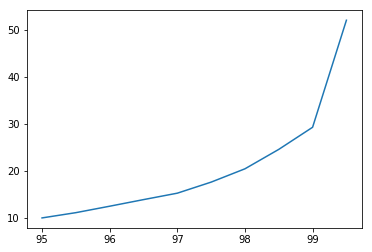

In [37]:
t = np.linspace(95,99.5,10)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

There is a sudden change between 99th percentile onwards

99.0 th percentile :  29.260534985921115
99.05555555555556 th percentile :  29.995598997246333
99.11111111111111 th percentile :  30.39957262714531
99.16666666666667 th percentile :  32.274772363349754
99.22222222222223 th percentile :  36.75318572797451
99.27777777777777 th percentile :  38.728997114851765
99.33333333333333 th percentile :  41.856131939804456
99.38888888888889 th percentile :  44.13990358245377
99.44444444444444 th percentile :  47.76500878928966
99.5 th percentile :  52.09944603311355


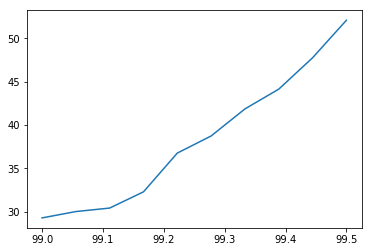

In [38]:
t = np.linspace(99,99.5,10)
for i in t:
    print(i, "th percentile : ",np.percentile(percentage_change_vector,i))

plt.plot(t,np.percentile(percentage_change_vector,t) )

Since there is no sudden rise, I will be taking 30% as my threshold

In [67]:
diff = (abs((weight1 - weight2)/weight1)) * 100
q = diff[np.where(diff > 30)].size
print("Percentage of features which did not change by more than 30% is :",(weight1.size - q)/weight1.size*100)

Percentage of features which did not change by more than 30% is : 99.07464674818021


## Printing features which got changed by more than 30%

In [84]:
feat_log = (abs((weight1 - weight2)/weight1)) * 100

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)
p = pd.DataFrame(feat_log.T,columns=['%change'])
p['feature'] = count_vect.get_feature_names()
q = p.sort_values(by = '%change',kind = 'quicksort',ascending= False)


In [90]:
p1 = q.loc[q['%change']>30]
print("The features which got changed by more than 30% are : \n",np.array(p1['feature']))

The features which got changed by more than 30% are : 
 ['combating' 'officinalis' 'matricaria' 'valeriana' 'chrysina'
 'scutellarian' 'physicals' 'dropp' 'mirky' 'packetthis' 'teachouses'
 'invitingly' 'marion' 'letterings' 'learntto' 'isignature' 'unrivalled'
 'reknowned' 'open' 'prematurely' 'doomsday' 'grabber' 'hase' 'applebee'
 'shurocka' 'fresheners' 'calendula' 'yarrow' 'asteraceae' 'antoinette'
 'penchant' 'trioka' 'shus' 'jiices' 'strengh' 'equisitely' 'appelation'
 'sine' 'preseratives' 'fructrose' 'artificialcolours' 'scrumtuutious'
 'foreswear' 'milliter' 'boilt' 'pronounciation' 'britvic' 'sopft'
 'sapple' 'proucts' 'comcntrated' 'chestnuts' 'menstruating'
 'pharmacopoeial' 'smileoverall' 'chastised' 'chastise' 'ado' 'fukusa'
 'chado' 'furo' 'natsume' 'connoseur' 'pasticcio' 'dims' 'proportioning'
 'eon' 'aberdeen' 'poets' 'buttocks' 'winded' 'merited' 'boorish'
 'disconnected' 'fuzziness' 'transpire' 'ensured' 'distinctions' 'wronged'
 'kitchenwares' 'silence' 'worthines

## Conclusion

**1. Since 99.7% of the features did not changed the values more than 30%, So we can say that there is no multicollinearity ** 